# Lecture 10

Sampling

### Deterministic sample:
* Sampling scheme doesn’t involve chance

### Probability (random) sample:
* Before the sample is drawn, you have to know the probability of selecting each group of people in the population
* Not all individuals need to have an equal chance of being selected

### Example: deterministic sample

Sample of students: take 50% of students, alphabetically by last name

### Example: probability sample

Sample of students: flip a coin for each student in class (heads, keep; tails, leave)

### Example: a probability sample
* Population: 3 individuals (A, B, C)
* Select a sample of 2
    - A chosen with probability 1
    - Choose B or C based on coin toss
* Possible samples: AB, AC, BC
    - Chance of AB: ½
    - Chance of AC: ½
    - Chance of BC = 0

In [285]:
#:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

plt.style.use('fivethirtyeight')

In [133]:
#:
top = Table.read_table('top_movies.csv')
top = top.with_column('Row Index', np.arange(top.num_rows))
top = top.move_to_start('Row Index')

top

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
3,Jurassic World,Universal,652270625,687728000,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
5,The Dark Knight,Warner Bros.,534858444,647761600,2008
6,Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
7,Star Wars,Fox,460998007,1549640500,1977
8,Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
9,The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


### Example: deterministic or probabilistic sample?
* a sample of 3 specific rows

In [134]:
top.take(make_array(3,5,8))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
3,Jurassic World,Universal,652270625,687728000,2015
5,The Dark Knight,Warner Bros.,534858444,647761600,2008
8,Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015


### Example: deterministic or probabilistic sample?
* a sample via a where statement

In [135]:
top.where('Title', are.containing('and the'))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
22,Harry Potter and the Deathly Hallows Part 2,Warner Bros.,381011219,417512200,2011
43,Harry Potter and the Sorcerer's Stone,Warner Bros.,317575550,486442900,2001
44,Indiana Jones and the Kingdom of the Crystal Skull,Paramount,317101119,384231200,2008
54,Harry Potter and the Half-Blood Prince,Warner Bros.,301959197,352098800,2009
59,Harry Potter and the Order of the Phoenix,Warner Bros.,292004738,369250200,2007
60,"The Chronicles of Narnia: The Lion, the Witch and the Wa ...",Buena Vista (Disney),291710957,393033100,2005
62,Harry Potter and the Goblet of Fire,Warner Bros.,290013036,393024800,2005
69,Harry Potter and the Chamber of Secrets,Warner Bros.,261988482,390768100,2002
76,Harry Potter and the Prisoner of Azkaban,Warner Bros.,249541069,349598600,2004
91,Beauty and the Beast,Buena Vista (Disney),218967620,394664300,1991


### Discussion question
Is the following sampling scheme a deterministic or probabilistic sample?
* Start with a random number; take every tenth row thereafter.

|Option|Answer|
|---|---|
|A| Deterministic|
|B| Probabilitstic|

###  Answer
* Start with a random number; take every tenth row thereafter.
* Any given row is equally likely to be picked! (But not true for groups of rows!)

In [136]:
start = np.random.choice(np.arange(10))
top.take(np.arange(start, 200, 10))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
7,Star Wars,Fox,460998007,1549640500,1977
17,The Hunger Games,Lionsgate,408010692,442510400,2012
27,The Passion of the Christ,NM,370782930,519432100,2004
37,Alice in Wonderland (2010),Buena Vista (Disney),334191110,365718600,2010
47,Star Wars: Episode II - Attack of the Clones,Fox,310676740,465175700,2002
57,The Sixth Sense,Buena Vista (Disney),293506292,500938400,1999
67,The Hangover,Warner Bros.,277322503,323343300,2009
77,Raiders of the Lost Ark,Paramount,248159971,770183000,1981
87,The Lost World: Jurassic Park,Universal,229086679,434216600,1997
97,Austin Powers: The Spy Who Shagged Me,New Line,206040086,352863900,1999


### Example: samples uniformly at random with(out) replacement
* `Table.sample` method
* `with_replacement=True` is default.

In [137]:
# with replacement
top.sample(5)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
152,Kramer Vs. Kramer,Columbia,106260000,374276100,1979
6,Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
43,Harry Potter and the Sorcerer's Stone,Warner Bros.,317575550,486442900,2001
14,The Lion King,Buena Vista (Disney),422783777,775573900,1994
9,The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


In [138]:
# without replacement
top.sample(5, with_replacement=False)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
64,Home Alone,Fox,285761243,589287500,1990
90,Mrs. Doubtfire,Fox,219195243,458354100,1993
139,Smokey and the Bandit,Universal,126737428,494446500,1977
158,Stir Crazy,Columbia,101300000,327624500,1980
185,West Side Story,MGM,43656822,486941500,1961


## Sample of Convenience
* Example: sample consists of whoever walks by
    - Just because you think you’re sampling “at random”, doesn’t mean you are.
* If you can’t figure out ahead of time 
    * what’s the population
    * what’s the chance of selection, for each group in the population

then you don’t have a random sample!

### Examples: sample of convenience

* Voluntary internet surveys
* Interviewing people on Library Walk
* The first 100 visits to a website after an email campaign begins.

### Samples of convenience: pros and cons
* Pros: 
    - Easy and inexpensive
    - Most common type of sample
* Cons: 
    - Results won't generalize to the population as a whole
    - Results are likely biased

### Example: sample of convenience

* Study: determine the average age and sex of gamblers at a casino 
* Methodology: conducted for three hours on a weekday afternoon 
* Bias: Might overrepresent elderly people who have retired and underrepresented by people of working age

# Distributions

## Probability Distribution
* Random quantity with various possible values
* “Probability distribution”:
    - All the possible values of the quantity
    - The probability of each of those values

## Empirical Distribution

* Based on observations
* Observations can be from repetitions of an experiment
* “Empirical Distribution”
    - All observed values
    - The proportion of counts of each value

### Example: Dice
* simulate a roll as a sample from a table

In [36]:
#:
die =  (
    Table()
    .with_column('face', np.arange(1, 7, 1))
)
die

face
1
2
3
4
5
6


In [37]:
# row a single die!
die.sample(1)

face
4


### The true distribution is uniform

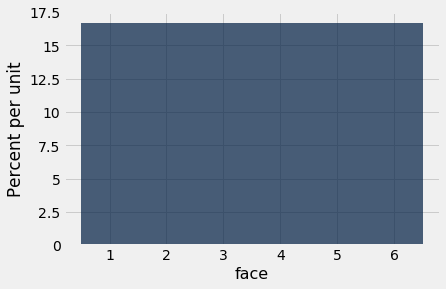

In [41]:
#
bins =  np.arange(0.5, 6.6, 1)
die.hist('face', bins=bins)

### Roll the die and plot the empirical distribution
* Try it for 10, 100, 1000, etc
* What does it converge to?

In [47]:
die.sample(10)

face
5
4
1
1
3
5
6
6
6
5


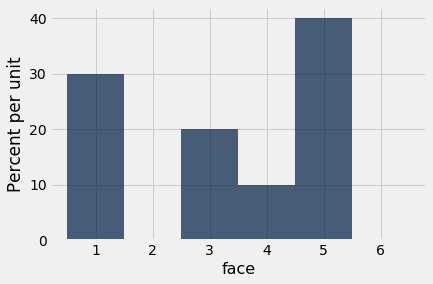

In [51]:
die.sample(10).hist('face', bins=bins)

# Large Random Samples

## Law of Averages

* If a chance experiment is repeated 
    - many times,
    - independently,
    - under the same conditions,
    
then the proportion of times that an event occurs gets closer to the theoretical probability of the event.


Example: As you roll a die repeatedly, the proportion of times you roll a 5 gets closer to 1/6.

## Large Random Samples

If the sample size is large, then the empirical distribution of a uniform random sample matches the distribution of the population, with high probability.

### Example: distribution of flight delays
* All united flights leaving SFO between 6/1/15 and 8/9/15.
* The underlying distribution is not known.
* All we have is the observed data!

In [57]:
#:
united = Table().read_table('united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


### Empirical distribution of flight delays
* What is the population?

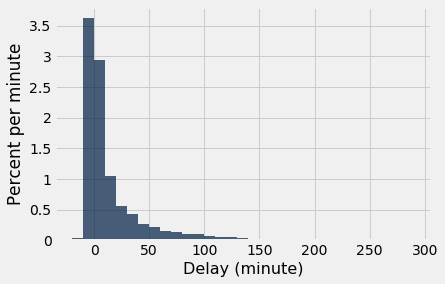

In [59]:
#: Plot empirical distribution of flight delays
bins = np.arange(-20, 300, 10)
united.hist('Delay', bins=bins, unit='minute')

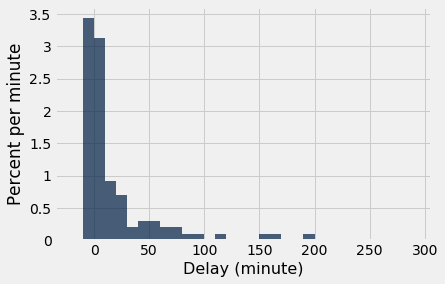

In [64]:
#:
N = 10**2
united.sample(N).hist('Delay', bins=bins, unit='minute')

### Estimating a statistic: mean
* Calculate the mean of all delays
* Compare to the mean of uniform samples

In [309]:
# calculate the mean
united_mean = united.column('Delay').mean()

In [257]:
#:
for n in np.arange(100, 10000, 200):
    m = united.sample(n).column('Delay').mean()
    print('number of flights: ', n, 'mean of sample: ', m)

number of flights:  100 mean of sample:  13.07
number of flights:  300 mean of sample:  17.2
number of flights:  500 mean of sample:  17.988
number of flights:  700 mean of sample:  16.034285714285716
number of flights:  900 mean of sample:  16.057777777777776
number of flights:  1100 mean of sample:  16.54
number of flights:  1300 mean of sample:  16.733076923076922
number of flights:  1500 mean of sample:  15.827333333333334
number of flights:  1700 mean of sample:  17.738823529411764
number of flights:  1900 mean of sample:  16.7
number of flights:  2100 mean of sample:  14.235238095238095
number of flights:  2300 mean of sample:  17.13304347826087
number of flights:  2500 mean of sample:  16.1692
number of flights:  2700 mean of sample:  16.77888888888889
number of flights:  2900 mean of sample:  16.77310344827586
number of flights:  3100 mean of sample:  16.134516129032257
number of flights:  3300 mean of sample:  16.90030303030303
number of flights:  3500 mean of sample:  17.3742

### Distribution of means from uniform samples with replacement
* Nice curve around the mean.
* Does the histogram skew one direction?

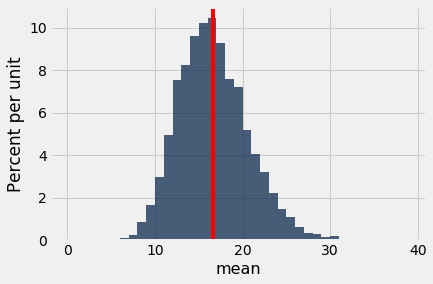

In [289]:
#:
n_experiments = 10000
means = make_array()
for n in np.arange(n_experiments):
    m = united.sample(100).column('Delay').mean()
    means = np.append(m, means)

Table().with_columns('mean', means).hist(bins=np.arange(0,40))
plt.axvline(x=united_mean, c='r');

### Distribution of means from uniform samples without replacement
* When sample size << population, sampling without replacement is similar to sampling with replacement.
* When sample size ~ population, this is *not* true.

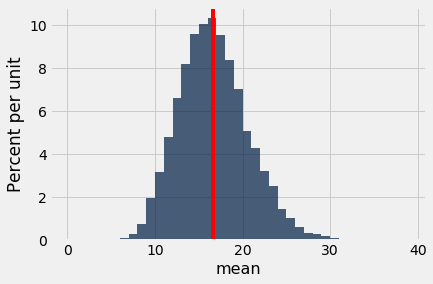

In [290]:
#:
n_experiments = 10000
means = make_array()
for n in np.arange(n_experiments):
    m = united.sample(100, with_replacement=False).column('Delay').mean()
    means = np.append(m, means)

Table().with_columns('mean', means).hist(bins=np.arange(0,40))
plt.axvline(x=united_mean, c='r');

### Distribution of means from uniform samples of flights from Denver
* This sample is a probability sample.
* Estimation of the mean is highly biased!

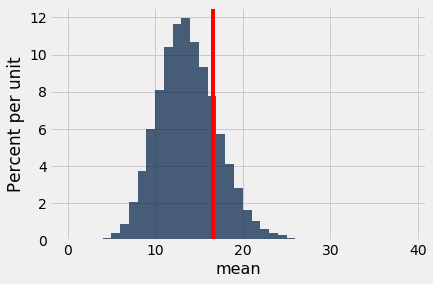

In [291]:
#:
n_experiments = 10000
means = make_array()

den = united.where('Destination', 'DEN')
for n in np.arange(n_experiments):
    m = den.sample(100).column('Delay').mean()
    means = np.append(m, means)

Table().with_columns('mean', means).hist(bins=np.arange(0,40))
plt.axvline(x=united_mean, c='r');

### Distribution of means from evenly-spaced random samples
* This sample is a probability sample.
* Why does the histogram look this way?

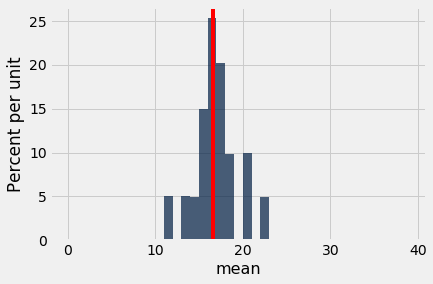

In [292]:
#:
n_experiments = 10000
means = make_array()
for n in np.arange(n_experiments):
    start = np.random.choice(np.arange(20))
    m = united.take(np.arange(start, united.num_rows, 50)).column('Delay').mean()
    means = np.append(m, means)

Table().with_columns('mean', means).hist(bins=np.arange(0,40))
plt.axvline(x=united_mean, c='r');

### Distribution of means from repeated samples of the first 100 rows
* Low variation and very high bias!

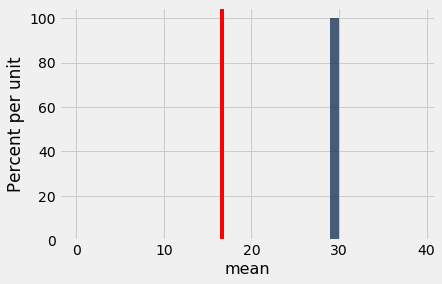

In [293]:
#:
n_experiments = 10000
means = make_array()
for n in np.arange(n_experiments):
    m = united.take(np.arange(100)).column('Delay').mean()
    means = np.append(m, means)

Table().with_columns('mean', means).hist(bins=np.arange(0,40))
plt.axvline(x=united_mean, c='r');

### Estimating probability: rolling a die $N$ times

### Discussion Question

If you roll a die 4 times. What's P(at least one 6)?

|Option|Answer|
|---|---|
|A| $5/6$|
|B| $1-5/6$|
|C| $1-(5/6)^4$|
|D| $1-(1/6)^4$|
|E| None of the above|


### Answer for 4 rolls
* P(at least one 6) = 1 - P(no 6) = 1 - (5/6)\**4

### Answer for N rolls
* P(at least one 6) = 1 - P(no 6) = 1 - (5/6)\**N

### Plot the true distribution for each N

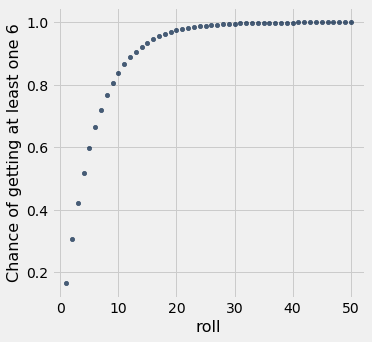

In [294]:
#:
rolls = np.arange(1, 51)
at_least_one = Table().with_columns('roll', rolls, 'Chance of getting at least one 6', 1-(5/6)**rolls)
at_least_one.scatter('roll')

### Simulate the probability for N=20
* What is the chance of getting at least one 6 in 20 rolls?

In [295]:
faces = np.arange(1, 7)
outcomes = np.random.choice(faces, 20) # pick random number from faces, 20 times
outcomes

array([5, 2, 1, 4, 1, 1, 5, 2, 3, 1, 4, 6, 4, 2, 6, 1, 4, 5, 5, 4])

In [296]:
# number of positive outcomes
np.count_nonzero(outcomes == 6)

2

In [298]:
rolled6 = 0
trials = 100000
for i in np.arange(trials):
    outcomes = np.random.choice(faces, 20)
    if np.count_nonzero(outcomes == 6) >=1:
        rolled6 = rolled6 + 1
        
#estimate the probability
rolled6/trials

0.97385

### Simulate the probability for N=20
* wrap the experiment in a function
* run the experiment many times

In [310]:
#:
def roll_20(trials):
    rolled6 = 0
    for i in np.arange(trials):
        outcomes = np.random.choice(faces, 20)
        if np.count_nonzero(outcomes == 6) >=1:
            rolled6 = rolled6 + 1

    return rolled6/trials

roll_20(1000)

0.978

In [307]:
#:
estimates = make_array()
for i in np.arange(500):
    estimates = np.append(roll_20(1000), estimates)
    
probs = Table().with_column('estimates', estimates)

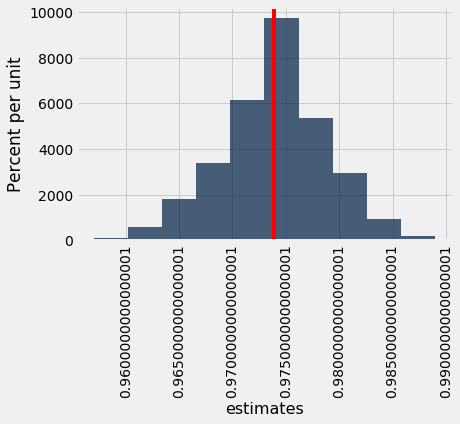

In [308]:
#:
probs.hist()
true_prob = 1 - (5/6)**20
plt.axvline(x=true_prob, c='r');